In [3]:
# 用arima模型测试时间序列模型
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import tsa
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Arial Unicode MS']
%matplotlib inline

In [4]:
f = pd.read_csv('/Users/jiaoxubin/Desktop/Purchase-Redemption-Data/user_balance_table.csv',parse_dates=['report_date'])
f[:1000:100]

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,2014-08-05,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
100,1,2014-04-10,20151,20149,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
200,6,2014-08-20,1236,1236,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
300,8,2014-08-19,107947,0,107947,107947,0,107947,0,0,0,0,0,0,NaN,NaN,NaN,NaN
400,11,2014-08-31,1071728,1101956,123,0,0,0,30351,0,30351,0,30351,123,NaN,NaN,NaN,NaN
500,11,2014-05-03,50849,50843,6,0,0,0,0,0,0,0,0,6,NaN,NaN,NaN,NaN
600,23,2014-05-18,1034433,1034301,132,0,0,0,0,0,0,0,0,132,NaN,NaN,NaN,NaN
700,23,2014-03-11,8163583,8180394,305,0,0,0,17116,0,17116,17116,0,305,NaN,NaN,NaN,NaN
800,27,2014-07-02,1999267,1999040,227,0,0,0,0,0,0,0,0,227,NaN,NaN,NaN,NaN
900,27,2014-06-16,1995541,1995291,250,0,0,0,0,0,0,0,0,250,NaN,NaN,NaN,NaN


In [5]:
daydf = f.groupby(['report_date'])
totaldf = daydf['total_purchase_amt','total_redeem_amt'].sum()
totaldf.head()

/var/folders/jd/dy4pf8d16h376hskv9jy3h1r0000gn/T/ipykernel_69156/1893615341.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totaldf = daydf['total_purchase_amt','total_redeem_amt'].sum()


,total_purchase_amt,total_redeem_amt
report_date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [6]:
totaldf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2013-07-01 to 2014-08-31
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_purchase_amt  427 non-null    int64
 1   total_redeem_amt    427 non-null    int64
dtypes: int64(2)
memory usage: 10.0 KB


Text(0.5, 1.0, '日申购赎回量时序图')

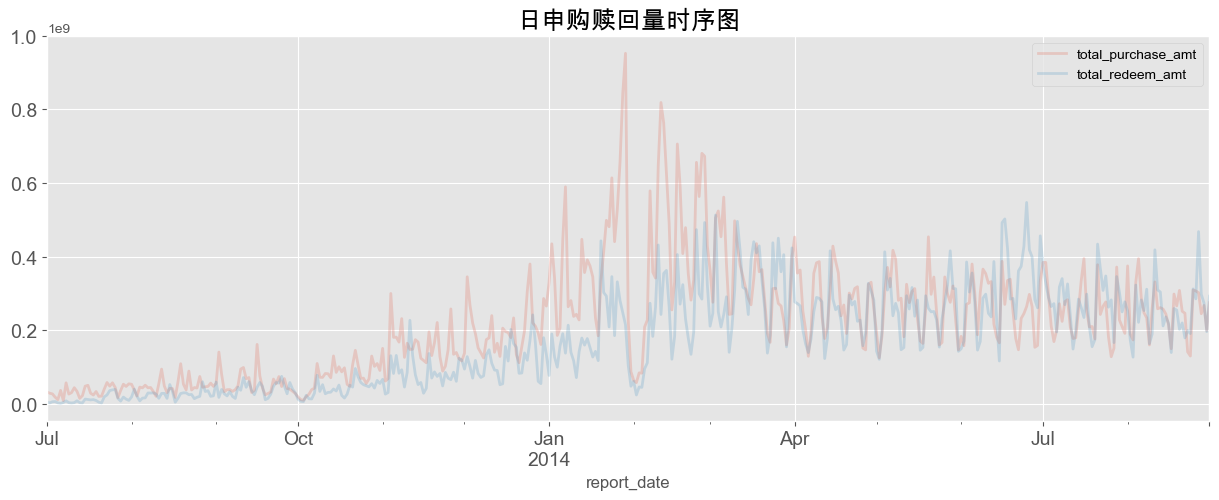

In [7]:
plt.style.use('ggplot')
fig = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,1),(0,0))
totaldf.plot(ax=ax1,alpha=0.2,linewidth=2,fontsize=14)
ax1.set_title('日申购赎回量时序图',fontsize=18)

### 平稳性检验

##### “total_purchase_amt”序列平稳性检验执行代码

In [8]:
t_purchase=tsa.stattools.adfuller(totaldf['total_purchase_amt'])
output_purchase=pd.DataFrame(index=["Test Statistic Value","p-value",
"Lags Used",
"Number of Observations Used","Critical Value(1%)"
"Critical Value (5%)",
"Critical Value (10%)"], columns= ['value'])
output_purchase['value']['Test Statistic Value'] = t_purchase[0]
output_purchase['value']['p-value']= t_purchase[1]
output_purchase['value']['Lags Used'] = t_purchase[2]
output_purchase['value']['Mumber of Observations Used'] = t_purchase[3]
output_purchase['value']['Critical Value (1%)'] = t_purchase[4]['1%']
output_purchase['value']['Critical Value (5%)']= t_purchase [4]['5%']
output_purchase['value']['Critical Value (10%)'] = t_purchase[4]['10%']
output_purchase

,value
Test Statistic Value,-1.58988
p-value,0.488675
Lags Used,18
Number of Observations Used,NaN
Critical Value(1%)Critical Value (5%),NaN
Critical Value (10%),-2.570557


##### “total_redeem_amt” 序列平稳性检验执行代码

In [9]:
t_redeem=tsa.stattools.adfuller(totaldf['total_redeem_amt'])
output_redeem=pd.DataFrame(index=["Test Statistic Value","p-value",
"Lags Used",
"Number of Observations Used","Critical Value(1%)"
"Critical Value (5%)",
"Critical Value (10%)"], columns= ['value'])
output_redeem['value']['Test Statistic Value'] = t_redeem[0]
output_redeem['value']['p-value']= t_redeem[1]
output_redeem['value']['Lags Used'] = t_redeem[2]
output_redeem['value']['Mumber of Observations Used'] = t_redeem[3]
output_redeem['value']['Critical Value (1%)'] = t_redeem[4]['1%']
output_redeem['value']['Critical Value (5%)']= t_redeem [4]['5%']
output_redeem['value']['Critical Value (10%)'] = t_redeem[4]['10%']
output_redeem

,value
Test Statistic Value,-1.372414
p-value,0.595428
Lags Used,13
Number of Observations Used,NaN
Critical Value(1%)Critical Value (5%),NaN
Critical Value (10%),-2.570511


##### 白噪声检验

In [10]:
from statsmodels.stats.diagnostic import acorr_ljungbox
purchase_p_value = acorr_ljungbox(totaldf['total_purchase_amt'],lags=1)
redeem_p_value = acorr_ljungbox(totaldf['total_redeem_amt'],lags=1)
purchase_p_value,redeem_p_value

(      lb_stat     lb_pvalue
 1  291.773786  2.042059e-65,
       lb_stat     lb_pvalue
 1  279.864805  8.036325e-63)

##### 原序列转化为平稳序列